In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
import os
import cv2
import torch
torch.nn.Module.dump_patches = True

In [2]:
torch.cuda.get_device_name(1)


'NVIDIA GeForce RTX 2080 Ti'

In [3]:
# ## Data

# Path to the parent folder, where the train (samples + masks) and validation (samples + masks) sets plus are located

# In[2]:


path = '/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset/'


fnames = get_image_files(os.path.join(path +'/val'))


# lbl_names = get_image_files(os.path.join(path+'/valannot'))


def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

classes = array(['Void','Dark Circles', 'Normal', 'wrinkles', 'Rosacia', 'Acne'])


mask = open_mask(get_y_fn(fnames[0]))


src_size = np.array(mask.shape[1:])


In [4]:
bs, size = 4, src_size

In [28]:
src = (SegmentationItemList.from_folder(path)
      .split_by_folder(valid='val')
      .label_from_func(get_y_fn, classes=classes))

In [37]:
data = (src.transform(get_transforms(max_rotate=2.0, max_warp=0.1), tfm_y=True)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

In [38]:
name2id = {v:k for k,v in enumerate(classes)}

def accuracy(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

In [5]:
from fastai.layers import FlattenedLoss, CrossEntropyFlat, BCEWithLogitsFlat
loss_func = CrossEntropyFlat()

In [81]:
src.train.x[0].data.dtype

torch.float32

In [82]:
data.train_ds[0][0].size

torch.Size([500, 500])

In [39]:
## to_fp16() switches the model to mixed precision mode. When the model is run on hardware that
# is optimised for mixed precision operation, then there should be a speed up in computation time.
## --> can use bigger batchsizes and possibly also bigger/more complex models. e.g. resnet50
# learn = unet_learner(data, models.resnet34, metrics=accuracy, wd=1e-2, bottle=True)#.to_fp16()
learn = unet_learner(data, models.resnet34, metrics=accuracy, wd=1e-2, bottle=True)#.to_fp16()

In [46]:
# In[24]:


## "classical" fitting. Here, training with a low learning rate after training 
## with the one-cycle policy above. Experimentally found that it further improves 
## the model performance
learn.fit(epochs = 20, lr = lr, wd = 0.3)




epoch,train_loss,valid_loss,accuracy,time
0,0.021395,0.050276,0.985734,00:08
1,0.022343,0.079512,0.984587,00:08
2,0.022241,0.047699,0.986420,00:08
3,0.021659,0.051813,0.983397,00:08
4,0.021050,0.057467,0.984388,00:08
5,0.022801,0.081451,0.985579,00:08
6,0.023726,0.058395,0.983709,00:08
7,0.022256,0.064051,0.986304,00:08
8,0.021134,0.049671,0.986034,00:09
9,0.020378,0.067090,0.984721,00:08


In [43]:
learn.show_results(rows=3, figsize=(20, 20)) # show results

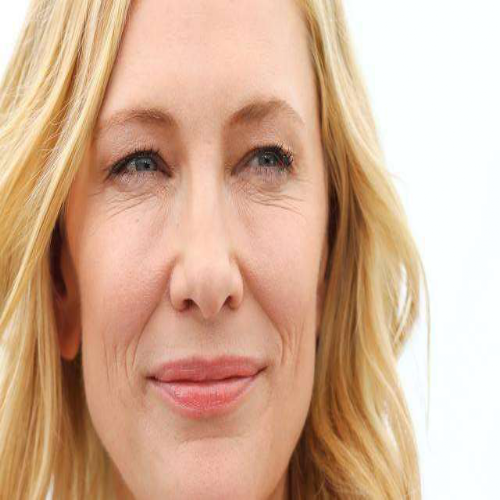

In [44]:
img.resize(500)

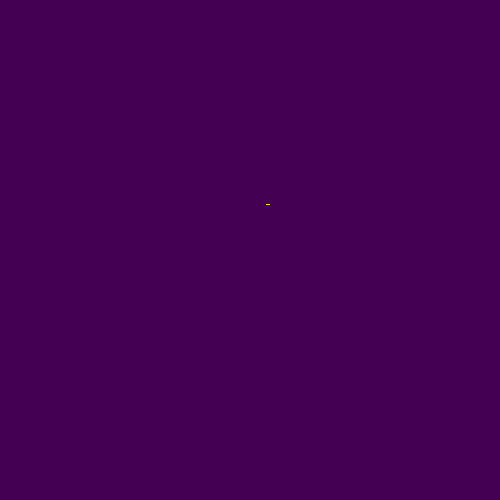

In [45]:
learn.predict(img)[0]

In [3]:
import os

In [4]:
print(os.path.abspath(os.path.curdir))

/media/dataA/ywzuo/project/Skin-Disease-Detection


In [45]:
# In[19]:


## store the weights, e.g. for creating a model checkpoint, experimenting etc.
learn.save('/media/dataA/ywzuo/project/Skin-Disease-Detection/model1_trained_6_17_2022')

In [ ]:
learn.save('/media/dataA/ywzuo/project/')

In [46]:
# In[36]:


## load the weights into a previously defined model (contained inside learn)
learn.load('/media/dataA/ywzuo/project/Skin-Disease-Detection/model1_trained_6_17_2022')

# In[27]:

## Export the model. The difference here is, that all the required information for retrieval of 
## model is stored in the same file, whereas above methode only stores the weights.
learn.export()

In [23]:
data.train_ds[0]

(Image (3, 500, 500), ImageSegment (1, 500, 500))

In [42]:
# ## Data

# Path to the parent folder, where the train (samples + masks) and validation (samples + masks) sets plus are located

# In[2]:


path_2 = '/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/'


# In[3]:


fnames_2 = get_image_files(os.path.join(path_2 +'/val'))


# In[4]:


lbl_names_2 = get_image_files(os.path.join(path_2+'/valannot'))


# In[5]:


def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

classes = array(['Void','Dark Circles', 'Normal', 'wrinkles', 'Rosacia', 'Acne','Freckles'])


# In[6]:


mask_2 = open_mask(get_y_fn(fnames_2[0]))


# In[7]:


src_size_2 = np.array(mask_2.shape[1:])


In [43]:
lbl_names_2

[PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/00001.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000010.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/0000100.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000011.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000012.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000013.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000014.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000015.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000016.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2/valannot/000017.png'),
 PosixPath('/media/dataA/ywzuo/project/Skin-Diseas

In [44]:
bs,size = 8,src_size_2

src_2 = (SegmentationItemList.from_folder(path_2)
       .split_by_folder(valid='val')
       .label_from_func(get_y_fn, classes=classes)
      )


data_2 = (src_2.transform(get_transforms(max_rotate = 2.0, max_warp = 0.1), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

name2id = {v:k for k,v in enumerate(classes)}

def accuracy(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()

In [45]:
data_2

ImageDataBunch;

Train: LabelList (221 items)
x: SegmentationItemList
Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294)
y: SegmentationLabelList
ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294)
Path: /media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2;

Valid: LabelList (221 items)
x: SegmentationItemList
Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294),Image (3, 222, 294)
y: SegmentationLabelList
ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294),ImageSegment (1, 222, 294)
Path: /media/dataA/ywzuo/project/Skin-Disease-Detection/dataset_2;

Test: None

In [46]:
## to_fp16() switches the model to mixed precision mode. When the model is run on hardware that
# is optimised for mixed precision operation, then there should be a speed up in computation time.
## --> can use bigger batchsizes and possibly also bigger/more complex models. e.g. resnet50
learn_2 = unet_learner(data_2, models.resnet34, metrics=accuracy, wd=1e-2, bottle=True)#.to_fp16()


In [47]:
lr_find(learn_2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


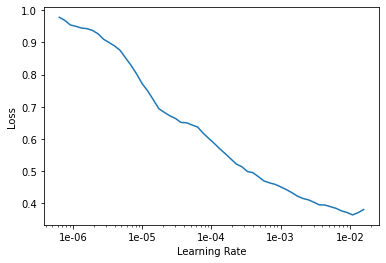

In [48]:
learn_2.recorder.plot()

In [49]:
lr_2=1e-5

In [50]:
# In[18]:


## fitting model with one-cycle policy
learn_2.fit_one_cycle(10, slice(lr_2), pct_start=0.6)


epoch,train_loss,valid_loss,accuracy,time
0,0.857906,0.773684,0.856352,00:11
1,0.571427,0.219891,0.966006,00:06
2,0.388598,0.193227,0.970295,00:06
3,0.291197,0.163446,0.971568,00:06
4,0.233338,0.140605,0.972080,00:06
5,0.192585,0.125589,0.972444,00:07
6,0.168443,0.119889,0.973159,00:06
7,0.146305,0.113551,0.974414,00:06
8,0.137233,0.107195,0.974451,00:06
9,0.128703,0.110066,0.974759,00:06


In [53]:
learn_2.fit(epochs = 20, lr = slice(None, 2e-4, None), wd = 0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.066760,0.055717,0.990272,02:58
1,0.059578,0.052719,0.990323,02:57
2,0.056202,0.048335,0.990288,02:56
3,0.052471,0.044259,0.990253,02:50
4,0.050203,0.042048,0.990434,02:50
5,0.048197,0.039850,0.990415,02:49
6,0.046999,0.043132,0.990391,02:56
7,0.045456,0.037924,0.990538,02:51
8,0.043945,0.037433,0.990601,02:55
9,0.042174,0.036305,0.990628,02:58


In [52]:
learn_2.fit(epochs = 20, lr = slice(None, 2e-4, None), wd = 0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.167224,0.124748,0.973384,00:06
1,0.136806,0.103017,0.975438,00:06
2,0.124203,0.096535,0.974075,00:06
3,0.119346,0.107885,0.974196,00:06
4,0.109891,0.100364,0.973204,00:06
5,0.105045,0.077077,0.979802,00:06
6,0.097769,0.076422,0.977516,00:07
7,0.104243,0.089474,0.977872,00:06
8,0.100925,0.083953,0.976994,00:06
9,0.094780,0.070564,0.981515,00:06


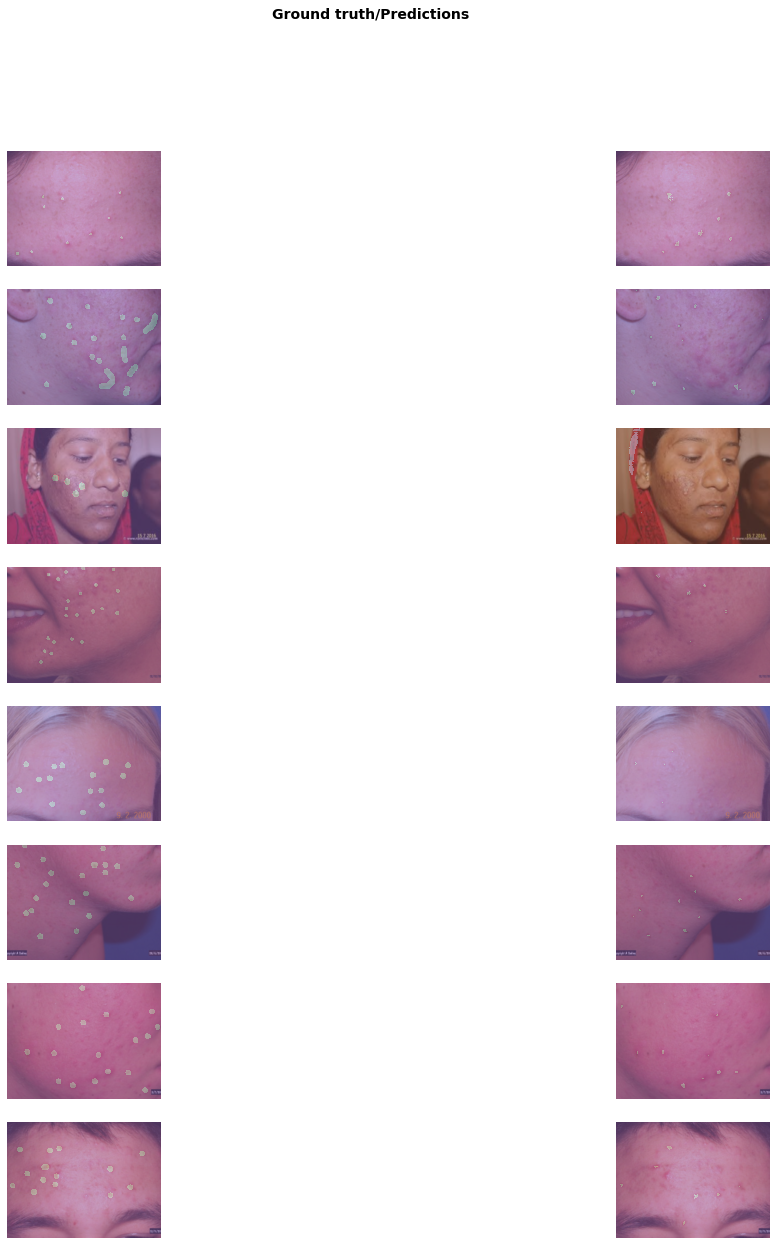

In [53]:
learn_2.show_results(rows=9, figsize=(20, 20)) # show results